In [1]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
cuda = torch.cuda.is_available()
cuda

False

In [3]:
train = MNIST('./data',train=True,download=True,transform =transforms.ToTensor())
test = MNIST('./data',train=False,download=True,transform =transforms.ToTensor())
train_data = train.data
train_data = train.transform(train_data.numpy())

In [4]:
train.data.size()
print(len(test.data.numpy() ) ) 

10000


In [5]:
test.targets.size()

torch.Size([10000])

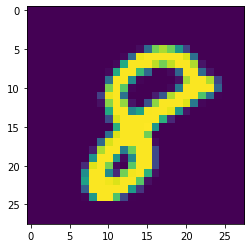

In [6]:
plt.imshow(train.data.cpu().numpy()[923])

In [7]:
class MyDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].long()
        return X,Y

In [8]:
import numpy as np
import torch
import pandas
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set_style('whitegrid')
from datetime import datetime
sys.platform
df_train = pandas.read_csv('/Users/bebik/Downloads/data/train.csv',header=None)#,nrows=700000)



/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    return torch.from_numpy(df.values).float() 
    

In [10]:
from sklearn.decomposition import PCA

def normalize1(X_train):
    import math
    same  = 0
    total = 0


    #X_train = df_test
    df1 =pd.DataFrame()
    df2 =pd.DataFrame()
    df3 =pd.DataFrame()
    df4 =pd.DataFrame()

    #df_pca = pd.DataFrame()
    #dft['result']  = X_train[X_train.columns[0]] 
    #X_train[1] = X_train[3]-X_train[1]
    
    for i in range(0,29):
        df_temp = pd.DataFrame()
        x = i*4
        #print(i)
        #df_temp[0] = X_train[X_train.columns[x+1]]-X_train[X_train.columns[x+5]]
        #df_temp[1] = X_train[X_train.columns[x+2]]-X_train[X_train.columns[x+6]]
        #df_temp[2] = X_train[X_train.columns[x+3]]-X_train[X_train.columns[x+7]]
        #df_temp[3] = X_train[X_train.columns[x+4]]-X_train[X_train.columns[x+8]]
       
        df1[i] = X_train[X_train.columns[x+5]]-X_train[X_train.columns[x+1]]
        df2[i] = X_train[X_train.columns[x+6]]-X_train[X_train.columns[x+2]]
        df3[i] = X_train[X_train.columns[x+7]]-X_train[X_train.columns[x+3]]
        df4[i] = X_train[X_train.columns[x+8]]-X_train[X_train.columns[x+4]]
        
#        X_reduced = PCA(n_components=3).fit_transform(iris.data)
        #pca = PCA(n_components=1)
        #pca.fit(df_temp)
        #df_pca = pca.transform(df_temp)
        #print("PCA VARIANCE ",pca.explained_variance_ratio_)

        #df33 = pd.DataFrame(data=df_pca)
        #dft[i] = df33[0]
    
    return X_train,df1,df2,df3,df4

#df_train.describe()

In [11]:
def normalize2(df,series,newdf):
    for i in range(28):
        newcol = str(i*4+series)+'z'
        newdf[newcol] =(df[df.columns[i] ]-df[df.columns[i]].mean() ) /df[df.columns[i]].std()
    return newdf

def normalize3(df_train):
    df_train ,df1,df2,df3,df4= normalize1(df_train)
    newdf =pd.DataFrame()
    newdf['res']= df_train[df_train.columns[0] ]
    #newdf = normalize2(df1,0,newdf)
    #newdf = normalize2(df2,1,newdf)
    newdf = normalize2(df3,2,newdf)
    newdf = normalize2(df4,3,newdf)

    return newdf
df_train = normalize3(df_train)
print (df_train.describe())

                 res            2z            6z           10z           14z  \
count  700000.000000  7.000000e+05  7.000000e+05  7.000000e+05  7.000000e+05   
mean        0.499653  2.070697e-17  3.187467e-17  1.413099e-17 -5.000601e-17   
std         0.500000  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min         0.000000 -1.358319e+02 -1.573637e+02 -2.320619e+02 -1.767994e+02   
25%         0.000000 -2.920642e-02 -2.555831e-02 -2.546232e-02 -2.886290e-02   
50%         0.000000 -6.328446e-04 -1.651408e-03  7.112844e-04 -4.319368e-04   
75%         1.000000  2.580837e-02  2.072300e-02  2.482441e-02  2.560484e-02   
max         1.000000  2.711047e+02  2.453320e+02  1.162502e+02  2.663445e+02   

                18z           22z           26z           30z           34z  \
count  7.000000e+05  7.000000e+05  7.000000e+05  7.000000e+05  7.000000e+05   
mean  -1.582115e-17 -1.962909e-16  4.112387e-18 -2.734945e-17  9.587943e-18   
std    1.000000e+00  1.000000e+00  1.00000

In [12]:
def create_data_loader(df):
    target = pd.DataFrame(df[df.columns[0]] )
    print(target)
    ten_target = torch.from_numpy(target[target.columns[0]].values)
    del df[df.columns[0] ]
    ten_data = df_to_tensor(df)


    _dataset = MyDataset(ten_data,ten_target)



    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
    else dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



df_validate = pandas.read_csv('/Users/bebik/Downloads/data/validate.csv',header=None)
df_validate = normalize3(df_validate)
print (df_validate.describe())
validate_target, validate_loader = create_data_loader(df_validate)

                res            2z            6z           10z           14z  \
count  50000.000000  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean       0.500560  2.734757e-17 -1.766087e-17 -6.862705e-18 -9.216308e-18   
std        0.500005  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min        0.000000 -2.884449e+01 -2.724074e+01 -3.472153e+01 -3.693919e+01   
25%        0.000000 -4.680297e-02 -4.646409e-02 -4.364539e-02 -4.830021e-02   
50%        1.000000 -1.374756e-03 -3.641369e-04  2.215469e-03 -2.990512e-03   
75%        1.000000  4.057570e-02  4.504776e-02  4.448153e-02  4.036337e-02   
max        1.000000  4.837794e+01  3.577733e+01  4.849435e+01  3.632376e+01   

                18z           22z           26z           30z           34z  \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -6.668138e-18  1.766517e-17  2.885470e-18  2.325924e-17  1.796306e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

In [13]:
df_test = pandas.read_csv('/Users/bebik/Downloads/data/test.csv',header=None)
ttt = normalize3(df_test)
del ttt[ttt.columns[0] ]
test_data = df_to_tensor(ttt)



In [14]:
def create_set(num,df):

    if (num == 0):
        df_train_sample = df
    else :
        df_train_sample = df.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[df_train_sample.columns[0]] )
    del df_train_sample[df_train_sample.columns[0]]
    ten_train_target = torch.from_numpy(target_sample[target_sample.columns[0]].values)
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)



    train_dataset = MyDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
    else dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

In [15]:
# Simple_MLP([784,100,50,10])

class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            if (op==0):
                layers.append(nn.ReLU())
            if (op ==1): 
                layers.append(nn.LeakyReLU())
            if (op ==2):
                layers.append(nn.ReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [16]:
# define the network for training
#model = Simple_MLP([784,16,50,8,200,10])


#model = Simple_MLP([120,16,200,10])
#model = Simple_MLP([120,80,40,20,12,2])

#model = Simple_MLP([120,80,60,40,20,2])
#model = Simple_MLP([120,110,106,104,100,90,88,82,80,70,60,50,40,60,80,30,20,10,8,6,4,4,2])


import random

criterion = nn.CrossEntropyLoss()
first_round = 56

device = torch.device( "cpu")
def create_ar(lens):
    
    r1 = 160
    r2 = 160
    ar = [first_round]
    for i in range(random.randint(1,lens)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(2)
    return ar
def next_gen(best_ar):
    
    ar_left = []
    ar_right = []
    for index,item in enumerate(best_ar):
        r1 = random.randint(4,140)
        if (index is 0 or index is len(best_ar)-1):
            r1=item
        if (index < len(best_ar)/4 ):
            ar_left.append(item)
            ar_right.append(r1)
        else:
            ar_left.append(r1)
            ar_right.append(item)
    
    return ar_left,ar_right,best_ar

def create_model(ar):   
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer ,ar
ar2=create_ar(10)
model,optimizer ,ar2= create_model(ar2)
next_gen(ar2)

Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=56, out_features=103, bias=True)
    (1): ReLU()
    (2): Linear(in_features=103, out_features=59, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=59, out_features=4, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=4, out_features=59, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=59, out_features=31, bias=True)
    (9): ReLU()
    (10): Linear(in_features=31, out_features=111, bias=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=111, out_features=2, bias=True)
  )
)


([56, 103, 49, 139, 48, 105, 65, 2],
 [56, 104, 59, 4, 59, 31, 111, 2],
 [56, 103, 59, 4, 59, 31, 111, 2])

In [17]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        #print(2)
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        #print(3)
        
        outputs = model(data)
        #print(outputs)
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss



In [18]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            
            _, predicted = torch.max(outputs.data,1)
            #print(predicted)
            total_predictions += target.size(0)
            correct_predictions += (predicted==target).sum().item()
            
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Test Loss: ',running_loss)
        print('Test Acc: ',acc,'%')
        return running_loss,acc,predicted

In [19]:
def submit_epoch(model,data):
    with torch.no_grad():
        #print(1)
        results = []
        model.eval()
        model.to(device)
        
        for batch_idx, data in enumerate(data):
            #print(3)
            data = data.to(device)
            #target = target.to(device)
            outputs = model(data)
            #print(outputs)
            #predicted = torch.max(outputs.data)
            #print (predicted)
            #result += predicted
            #total_predictions += target.size(0)
            #correct_predictions += (predicted==target).sum().item()
#            print(outputs.data)
            predicted_source, predicted = torch.max(outputs.data,0)
            #print (predicted)
            xxx = predicted.item()
            results.append(xxx)
            #loss = criterion(outputs,target).detach()
            #running_loss += loss.item()
        #running_loss /= len(test_loader)
        #acc = (correct_predictions/total_predictions)*100.0
        #print('Test Loss: ',running_loss)
        #print('Test Acc: ',acc,'%')
        return results

In [23]:

n_epoch = 10
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0

arx = create_ar(8)
best , ar1,ar2 = next_gen(arx)
loops = [best,ar1,ar2,arx]

results =[]
best_score =0
for generations in range (99):
    for index in range(4):
        criterion = nn.CrossEntropyLoss()

        model ,optimizer ,ar = create_model(loops[index])
        temp_model = model
        temp_optimizer = optimizer
       
        for i in range(n_epoch):
            train_loader = create_set(70000,df_train)
            train_loss = train_epoch(temp_model,train_loader,criterion,temp_optimizer)
            test_loss,test_acc,pre = test_epoch(temp_model,validate_loader,criterion)

            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            Test_acc.append(test_acc)
            print('='*50,generations)
        
        if (test_acc > best_score):
            print ("updating model ======= ", test_acc)
            best_model = temp_model
            best_optimizer = temp_optimizer
            best_score = test_acc
        
        results.append(test_acc)
    if (results[0]> results[1] and results[0]> results[2] and results[0]> results[3]):
        print('results 0')
        best
        a,b,best = next_gen(loops[0])
    
    if (results[1]> results[0] and results[1]> results[2] and results[1]> results[3]):
        print('results 1')
        a,b,best = next_gen(loops[1])
    if (results[2]> results[0] and results[2]> results[1] and results[2]> results[3]):
        print('results 2')
        a,b,best = next_gen(loops[2])

    if (results[3]> results[0] and results[3]> results[1] and results[3]> results[2]):
        print('results 2')
        a,b,best = next_gen(loops[3])


    c=create_ar(8)
    loops = [a,b,best,c]
    results =[]
        #print(pre)
    #model2 ,optimizer2 = create_model()



    

Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=56, out_features=55, bias=True)
    (1): ReLU()
    (2): Linear(in_features=55, out_features=118, bias=True)
    (3): ReLU()
    (4): Linear(in_features=118, out_features=2, bias=True)
  )
)
Train Loss:  0.6905690059609657  Time:  1.005028247833252
Test Loss:  0.6750730957303729
Test Acc:  58.866 %
================================================== 0
Train Loss:  0.6866521646071525  Time:  1.063413143157959
Test Loss:  0.6737069104398999
Test Acc:  59.194 %
================================================== 0
Train Loss:  0.6855462056441899  Time:  1.0517208576202393
Test Loss:  0.6721295522791999
Test Acc:  59.504000000000005 %
================================================== 0
Train Loss:  0.6842814348909977  Time:  1.0340511798858643
Test Loss:  0.6725345804375045
Test Acc:  58.358 %
================================================== 0
Train Loss:  0.6826565872578725  Time:  1.1063261032104492
Test Loss:  0.6706606335177

KeyboardInterrupt: 

In [28]:
for i in range(99):
            train_loader = create_set(50000,df_train)
            train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
            test_loss,test_acc,pre = test_epoch(best_model,validate_loader,criterion)

            
            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            Test_acc.append(test_acc)
            print('='*50,i)
predicted_res = submit_epoch(model,test_data)

df = pd.DataFrame(predicted_res)
df.to_csv('/Users/bebik/Downloads/data/033363870_10.txt',index=False,header=None)




Train Loss:  0.6708108797973517  Time:  1.1604208946228027
Test Loss:  0.6688035106172368
Test Acc:  58.209999999999994 %
================================================== 0
Train Loss:  0.6712623156455099  Time:  1.1579952239990234
Test Loss:  0.6688442072089837
Test Acc:  58.098000000000006 %
================================================== 1
Train Loss:  0.670500567981175  Time:  1.277318000793457
Test Loss:  0.6689721738197365
Test Acc:  57.943999999999996 %
================================================== 2
Train Loss:  0.6716652147623957  Time:  1.1493730545043945
Test Loss:  0.6674726772673276
Test Acc:  57.07 %
================================================== 3
Train Loss:  0.6710972326750658  Time:  1.2299470901489258
Test Loss:  0.6689005332941912
Test Acc:  57.154 %
================================================== 4
Train Loss:  0.669608107634953  Time:  1.2284560203552246
Test Loss:  0.6677745328265794
Test Acc:  57.498000000000005 %
===============================

In [ ]:

df = pd.DataFrame(predicted_res)
df.to_csv('/Users/bebik/Downloads/data/033363870_11.txt',index=False,header=None)



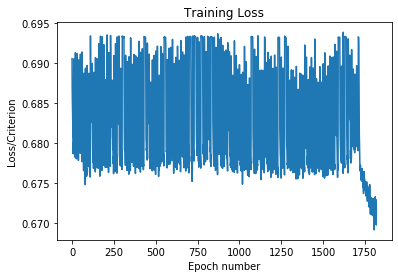

In [25]:
plt.title('Training Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss/Criterion')
plt.plot(Train_loss)

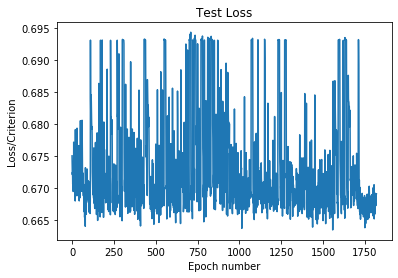

In [26]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss/Criterion')
plt.plot(Test_loss)

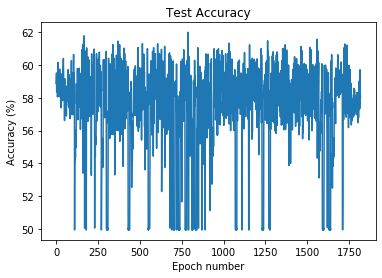

In [27]:
plt.title('Test Accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc)